In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\MAHMOUD\Downloads\covid 19\covid_19_clean_complete.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [4]:
df.drop('Province/State', axis=1, inplace=True)

In [5]:
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [7]:
df.isnull().sum()

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [14]:
df.describe(include="object")

,Country/Region,Date,WHO Region
count,49068,49068,49068
unique,187,188,6
top,China,2020-01-22,Europe
freq,6204,261,15040


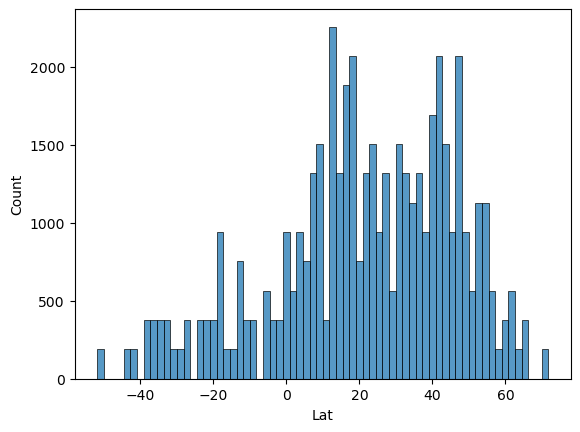

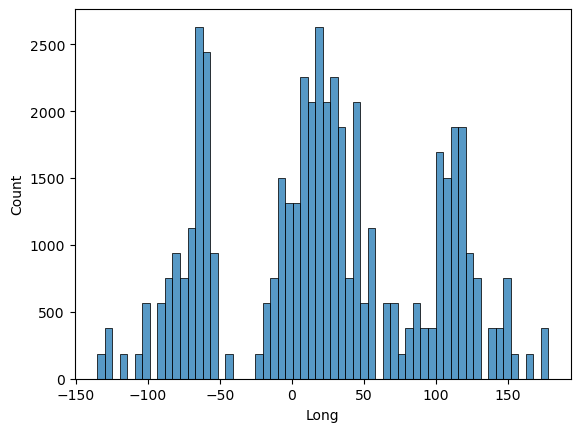

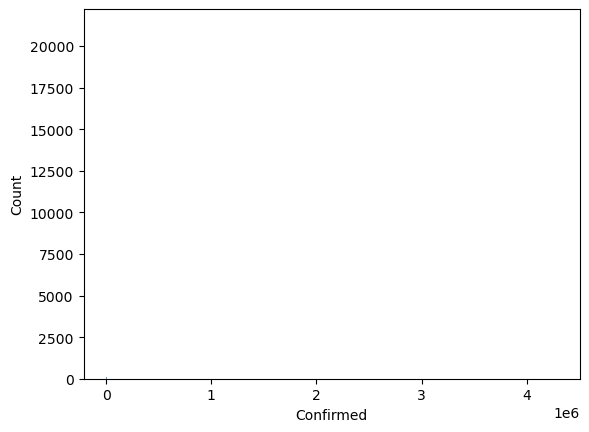

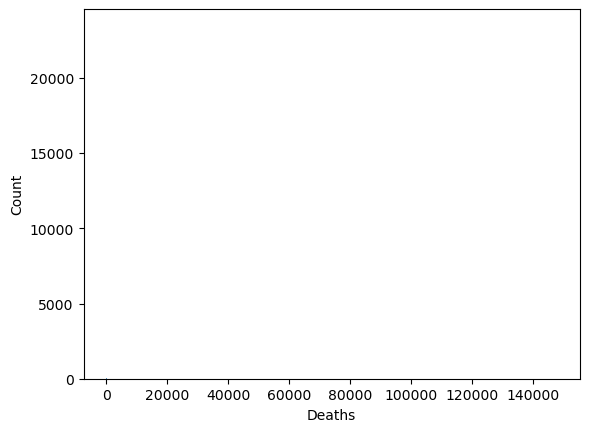

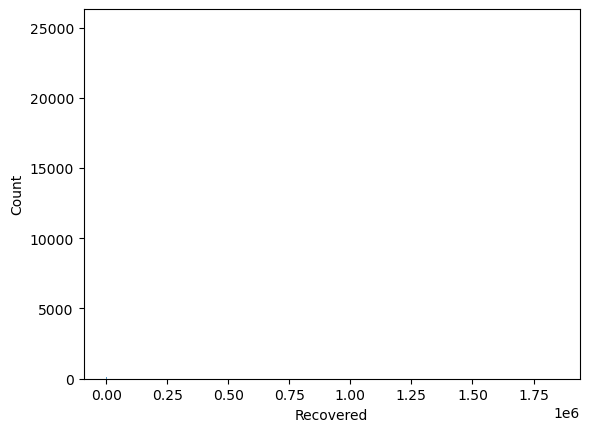

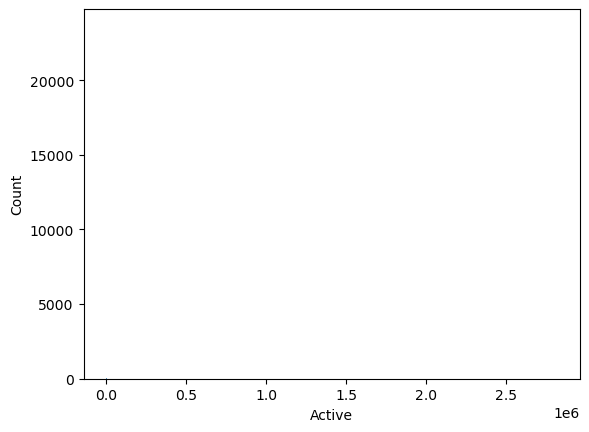

In [18]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

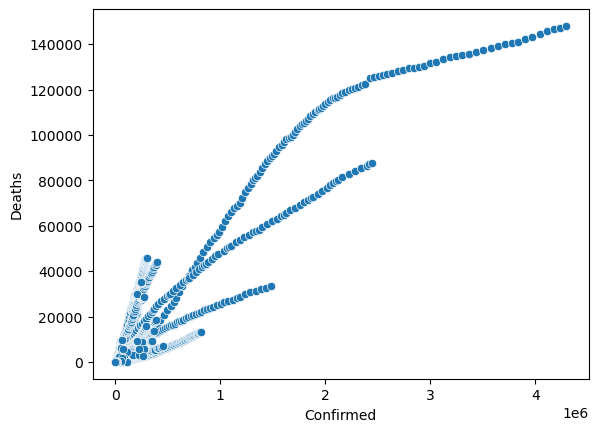

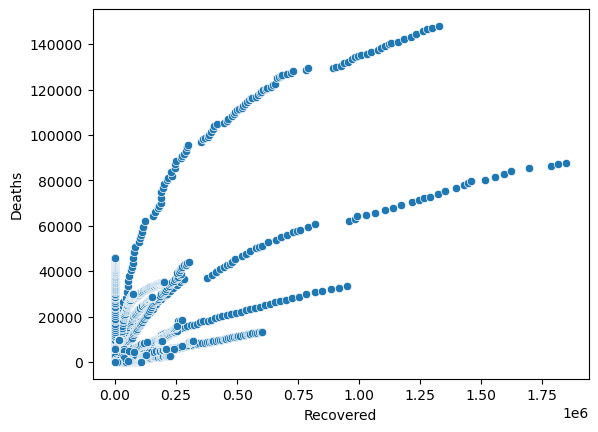

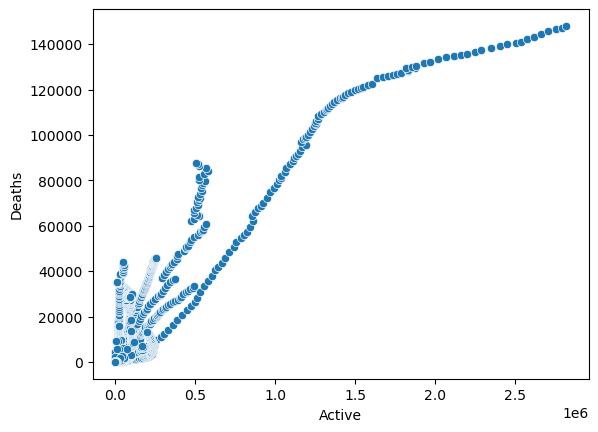

In [19]:
for i in['Confirmed', 'Recovered', 'Active']:
    sns.scatterplot(data=df,x=i,y='Deaths')
    plt.show()

In [21]:
heatmap=df.select_dtypes(include="number").corr()

<Axes: >

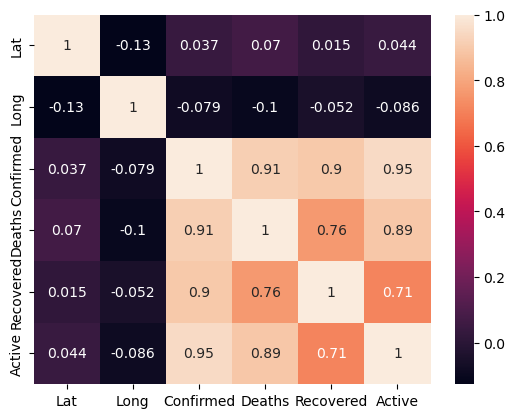

In [22]:
sns.heatmap(heatmap,annot=True)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
data = pd.read_csv(r"C:\Users\ABBA\Downloads\covid 19\covid_19_clean_complete.csv")

# Define the target variable: High-severity outbreak (1 for >1000 deaths, 0 otherwise)
data['High_Severity'] = (data['Deaths'] > 500).astype(int)

# Select features
features = ['Confirmed', 'Recovered', 'Active']
X = data[features]
y = data['High_Severity']

# Encode categorical features (if any)
if 'WHO Region' in data.columns:
    encoder = LabelEncoder()
    data['WHO_Region_Encoded'] = encoder.fit_transform(data['WHO Region'])
    X['WHO_Region_Encoded'] = data['WHO_Region_Encoded']

# Standardize the features (SVM is sensitive to feature scaling)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
model = DecisionTreeClassifier()  # 'rbf' kernel is commonly used for non-linear data
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

C:\Users\ABBA\AppData\Local\Temp\ipykernel_984\1175613448.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['WHO_Region_Encoded'] = data['WHO_Region_Encoded']


Accuracy: 0.9865498267780721

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8897
           1       0.93      0.93      0.93       917

    accuracy                           0.99      9814
   macro avg       0.96      0.96      0.96      9814
weighted avg       0.99      0.99      0.99      9814

